**Load the Data**

The Fashion-MNIST dataset is a dataset of Zalando's article images, with 28x28 grayscale images of 70,000 fashion products from 10 categories, and 7,000 images per category. The training set has 60,000 images, and the test set has 10,000 images.

The train and test images along with the labels are loaded and stored in variables train_X, train_Y, test_X, test_Y

In [2]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


**Analyze the Data**



In [3]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


From the above output, you can see that the training data has a shape of 60000 x 28 x 28 since there are 60,000 training samples each of 28 x 28 dimension. Similarly, the test data has a shape of 10000 x 28 x 28 since there are 10,000 testing samples.

In [4]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


There's also a total of ten output classes that range from 0 to 9.

Text(0.5, 1.0, 'Ground Truth : 9')

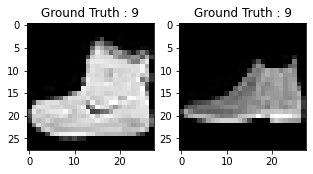

In [5]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))


The output of above two plots looks like an ankle boot, and this class is assigned a class label of 9. Similarly, other fashion products will have different labels, but similar products will have same labels. This means that all the 7,000 ankle boot images will have a class label of 9.

Data Preprocessing

In [6]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

The data right now is in an int8 format, so before you feed it into the network you need to convert its type to float32, and you also have to rescale the pixel values in range 0 - 1 inclusive.

In [7]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

Now you need to convert the class labels into a one-hot encoding vector.

In one-hot encoding, you convert the categorical data into a vector of numbers. The reason why you convert the categorical data in one hot encoding is that machine learning algorithms cannot work with categorical data directly. You generate one boolean column for each category or class. Only one of these columns could take on the value 1 for each sample. Hence, the term one-hot encoding.

In [8]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


**Create and check shape of training and validation set.**

In [9]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [10]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

**The Network**

The images are of size 28 x 28. You convert the image matrix to an array, rescale it between 0 and 1, reshape it so that it's of size 28 x 28 x 1, and feed this as an input to the network.

Three convolutional layers:

The first layer will have 32-3 x 3 filters,
The second layer will have 64-3 x 3 filters and
The third layer will have 128-3 x 3 filters.
In addition, there are three max-pooling layers each of size 2 x 2.

In [12]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

Set parameters.

We will use a batch size of 64 using a higher batch size of 128 or 256 is also preferable it all depends on the memory. It contributes massively to determining the learning parameters and affects the prediction accuracy. You will train the network for 20 epochs.

In [13]:
batch_size = 64
epochs = 20
num_classes = 10

**Neural Network Architecture**

In [14]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

First add a first convolutional layer with Conv2D(). Because we're working with images! 

Next, add the Leaky ReLU activation function which helps the network learn non-linear decision boundaries. Since we have ten different classes, you'll need a non-linear decision boundary that could separate these ten classes which are not linearly separable.

The ReLU activation function is used instead of logistic sigmoid function.

Next, we'll add the max-pooling layer with MaxPooling2D() and so on.In this layer we shrink the image stack into a smaller size. Pooling is done after passing through the activation layer.

The last layer is a Dense layer that has a softmax activation function with 10 units, which is needed for this multi-class classification problem.

**Compile the Model**

After the model is created, we compile it using the Adam optimizer, one of the most popular optimization algorithms. Additionally, you specify the loss type which is categorical cross entropy which is used for multi-class classification, you can also use binary cross-entropy as the loss function. Lastly, we specify the metrics as accuracy which you want to analyze while the model is training.

In [15]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [16]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

**Train the Model**

In [17]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 80s 106ms/step - loss: 0.6844 - accuracy: 0.7485 - val_loss: 0.3623 - val_accuracy: 0.8653
Epoch 2/20
750/750 [==============================] - 79s 106ms/step - loss: 0.3016 - accuracy: 0.8916 - val_loss: 0.2801 - val_accuracy: 0.8967
Epoch 3/20
750/750 [==============================] - 80s 106ms/step - loss: 0.2418 - accuracy: 0.9122 - val_loss: 0.2451 - val_accuracy: 0.9103
Epoch 4/20
750/750 [==============================] - 80s 106ms/step - loss: 0.2053 - accuracy: 0.9252 - val_loss: 0.2356 - val_accuracy: 0.9136
Epoch 5/20
750/750 [==============================] - 80s 106ms/step - loss: 0.1783 - accuracy: 0.9329 - val_loss: 0.2234 - val_accuracy: 0.9189
Epoch 6/20
750/750 [==============================] - 80s 106ms/step - loss: 0.1521 - accuracy: 0.9433 - val_loss: 0.2419 - val_accuracy: 0.9153
Epoch 7/20
750/750 [==============================] - 80s 106ms/step - loss: 0.1353 - accuracy: 0.9481 - val_loss: 0.2401 - val_ac

**Model Evaluation on the Test Set**

In [18]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test accuracy:', test_eval[1])

Test accuracy: 0.9143999814987183


**Reference:**

https://www.tensorflow.org/tutorials/generative/style_transfer

https://towardsdatascience.com/build-your-own-convolution-neural-network-in-5-mins-4217c2cf964f

https://www.edureka.co/blog/convolutional-neural-network/

https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python